# LISTA 4

Problema

$
\text{min} \quad x_2\\
\text{s.a.:} \\
\quad\quad        x_1 \leq 0 \\
\quad\quad        -x_2 \leq 0 \\
\quad\quad        x^2_1 x_x \leq 0 \\
\quad\quad        x^3_1 x_x \leq 0
$

# 1. Gráficos das restrições

## Bibliotecas

In [140]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
from matplotlib.collections import *

## Funções de desigualdade

In [152]:
def h_1(X):
    return X[0]
def h_2(X):
    return -X[1]
def h_3(X):
    return X[0]**2 * X[1]
def h_4(X):
    return X[0]**3 * X[1]

## 1.a Encontrar a região viável

A região viável $\Omega$ é a região onde todas as restrições são satisfeitas $$\Omega:=\{ X : h_1(X) \leq 0 \cap h_2(X) \leq 0 \cap h_3(X) \leq 0 \cap h_4(X) \leq 0 \}$$

In [142]:
def h_inters(X): # Intersection
    h1 = h_1(X)
    h2 = h_2(X)
    h3 = h_3(X)
    h4 = h_4(X)
    if h1 <= 0 and h2 <= 0 and h3 <= 0 and h4 <= 0:
        return True
    return False

Desta forma, o resultado encontrado está apresentado na célula abaixo (os resultados foram obtidos antes de forma analítica).

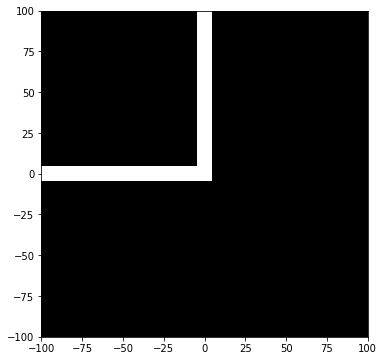

In [143]:
im_range = 100.0
im_step = 1.0

def get_viable_region_matrix(h):
    x_1_list = arange(-im_range, im_range + 0.1, 1)
    x_2_list = arange(-im_range, im_range + 0.1, 1)
    X_1, X_2 = meshgrid(x_1_list, x_2_list)
    H_list = zeros(X_1.shape)
    for i in range(X_1.shape[0]):
        for j in range(X_2.shape[1]):
            X = array([
                [X_1[i,j]],
                [X_2[i,j]]
            ])
            H_list[i,j] = h(X)
    return H_list

def plot_constraints(H_list):
    fig = figure(figsize=(6,6))
    imshow(
        H_list, interpolation='none', origin='lower', 
        cmap=cm.gray, extent=(-im_range, im_range, -im_range, im_range)
    )
    
H_inters_list = get_constraint_region_matrix(h_inters)
plot_constraints(H_inters_list)

A região viável está em 

$
\Omega = \{ X : (x_1 = 0 \cap  x_2 \geq 0) \cup (x_2 = 0 \cap  x_1 \leq 0)\}
$

# 2. Encontrar o conjunto de otimizadores $\Omega^*=\{X^*\}$

## 2.a. Condições de Karush-Kuhn-Tucker (KKT)

O ponto ótimo deve respeitas as condições:

1. $\nabla f(X^*)=-\sum_{i=1}^{4}{\nabla h_i(X^*) \mu_i}$
2. $ h_i(X^*) \mu_i = 0$
3. $ \mu_i \geq 0 $

## 2.b. Condição 1

**Cálculo dos gradientes**

$\nabla f(X) = \begin{bmatrix}
0\\
1
\end{bmatrix}$,
$\nabla h_1(X) = \begin{bmatrix}
1\\
0
\end{bmatrix}$, 
$\nabla h_2(X) = \begin{bmatrix}
0\\
-1
\end{bmatrix}$,
$\nabla h_3(X) = \begin{bmatrix}
2 x_1 x_2\\
x_1^2
\end{bmatrix}$,
$\nabla h_4(X) = \begin{bmatrix}
3 x_1^2 x_2\\
x_1^3
\end{bmatrix}$


**Aplicação na condição 1**

$
\begin{bmatrix}
    0\\
    1
\end{bmatrix}=- \begin{pmatrix}
\begin{bmatrix}
    1\\
    0
\end{bmatrix}\mu_1+
\begin{bmatrix}
    0\\
    -1
\end{bmatrix}\mu_2+
\begin{bmatrix}
    2 x_1 x_2\\
    x_1^2
\end{bmatrix}\mu_3+
\begin{bmatrix}
    3 x_1^2 x_2\\
    x_1^3
\end{bmatrix}\mu_4
\end{pmatrix}
$

**O que leva ao sistema de equações:**
\begin{matrix}
\text{Eq. 2.b.1} & 1\mu_1 & + & 0\mu_2 & + & 2x_1 x_2\mu_3  & + & 3 x_1^2 x_2 \mu_4 & = & 0\\ 
\text{Eq. 2.b.2} & 0\mu_1 & + & -1\mu_2 & + & x_1^2\mu_3 & + & x_1^3\mu_4 & = & -1
\end{matrix}

**Se dividirmos o conjunto viável em dois, temos**
1. $\Omega_1 = \{ X : x_1=0 \cap x_2 \geq 0 \}$
2. $\Omega_2 = \{ X : x_1\leq 0 \cap x_2 = 0 \}$

**Da Equação 2.b.1**, temos que $\mu_1=0$, visto que ou $x_1 = 0$ ou $x_2 = 0$

**Desta forma, resta a equação 2.b.2**

**2.b.2:** $
-1\mu_2 +x_1^2\mu_3 + x_1^3\mu_4 = -1
$

## 2.c. Condição  2

$
\text{a.} \quad x_1 \mu_1 = 0 \\
\text{b.} \quad - x_2 \mu_2 = 0  \\
\text{c.} \quad x_1^2 x_2 \mu_3 = 0 \\
\text{d.} \quad x_1^3 x_2 \mu_4 = 0 \\
$

* A equação **a** é sempre satisfeita, visto que $\mu_1 = 0$, $\forall x_1 \in \mathbb{R}$.
* As equações **c** e **d** são sempre satisfeitas, visto que $x_1=0$ ou $x_2=0$, $\forall \mu_3, \mu_4 \in \mathbb{R}$
* Cabe prosseguir com **b**

**A equação b. da condição 2 (Equação 2.c.b)** pode ser usada em conjunto da **Equação 2.b.2**, tal que:

* $-1\mu_2 +x_1^2\mu_3 + x_1^3\mu_4 = -1$
    * $\mu_2 = x_1^2\mu_3 + x_1^3\mu_4 +1$
* **Na Equação 2.c.b:** $-x_2( x_1^2\mu_3 + x_1^3\mu_4 +1) = 0$, 
    * Isto leva a $x_2=0$
    
Logo, sabemos que os pontos que minimizam o problema estão contidos no conjunto viável $\Omega_2$, ou seja, $x_1 \leq 0$ e $x_2=0$ 

## 2.d Condição 3
Ainda resta provar que $\mu_i \geq 0$, $i=1,2,3,4$. Pela condição 1, sabemos que $\mu_1 = 0$ e pela condição 2 temos que $\mu_3,\mu_4 \in \mathbb{R}$. Com a condição 3, temos que $\mu_3,\mu_4 \geq 0$. Logo, precisamos que $\mu_2 \geq 0$. Assim

$
\mu_2 = x_1^2 \mu_3 + x_1^3 \mu_4 + 1 \geq 0
$

Com um pouco de manipulação, chegamos a

$
\mu_3 + x_1 \mu_4 \geq \frac{-1}{x_1^2}
$

Como $\frac{-1}{x_1^2} \leq 0$, então

$
\mu_3 + x_1 \mu_4 \geq 0 \Rightarrow x_1 \geq \frac{-\mu_3}{\mu_4}
$

Como $\frac{-\mu_3}{\mu_4} \leq 0$, então

$
x_1 \geq 0
$

Sabemos que $X \in \Omega_2$, portanto, para existir, $x_1=0$. De fato, se $x_1 = 0$, temos que $\mu_2=1\geq 0$.

Portanto, o minimizador $X^*$ de $f(X)$ é o ponto $X^*=(0,0)$.

## Dúvida
A partir do momento que definimos que a solução estava contida em $\Omega_2$, temos que $f(x)=x_2=0$. Isto não deveria ser o suficiente para definir que $\{X^*\}$ na verdade é o conjunto $\Omega_2$? Afinal, independente de $x_1$, $f(X)$ terá o mesmo valor. Onde parar esta questão?

# 3. Implementar o problema

In [157]:
from scipy.optimize import *

ineq_cons = []
ineq_cons.append({'type': 'ineq',
              'fun' : h_1,
              'jac' : lambda X: np.array([[1.0,
                                          0.0]])})
ineq_cons.append({'type': 'ineq',
              'fun' : h_2,
              'jac' : lambda X: np.array([[0.0,
                                          -1.0]])})
ineq_cons.append({'type': 'ineq',
              'fun' : h_3,
              'jac' : lambda X: np.array([[2.*X[0]*X[1],
                                            X[0]**2]])})
ineq_cons.append({'type': 'ineq',
              'fun' : h_4,
              'jac' : lambda X: np.array([[3.*(X[0]**2)*X[1],
                                            X[0]**3]])})

def f(X):
    return X[1]

def gen_init_points():
    list_pts = []
    x_1_list = arange(-150, 150 + 0.1, 10)
    x_2_list = arange(-150, 150 + 0.1, 10)
    for idx1 in range(x_1_list.shape[0]):
        for idx2 in range(x_2_list.shape[0]):
            list_pts.append([ [x_1_list[idx1]], [x_2_list[idx2]] ])
    return list_pts

list_pts = gen_init_points()
list_sol = []
for X_init in list_pts:
    sol = minimize(f, X_init, constraints=ineq_cons)
    list_sol.append(sol["x"])

    

     fun: -203839827.1811699
     jac: array([0., 2.])
 message: 'Inequality constraints incompatible'
    nfev: 116
     nit: 25
    njev: 25
  status: 4
 success: False
       x: array([-1.14242726e-09, -2.03839827e+08])
     fun: -304828656.8392854
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 22
    njev: 21
  status: 0
 success: True
       x: array([-6.24236901e-17, -3.04828657e+08])
     fun: -319606506.7166344
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 113
     nit: 28
    njev: 28
  status: 0
 success: True
       x: array([-6.18479033e-17, -3.19606507e+08])
     fun: -317790162.860998
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 110
     nit: 25
    njev: 25
  status: 0
 success: True
       x: array([-4.87686850e-16, -3.17790163e+08])
     fun: -519453572.83692586
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
 

     fun: 4.913319222107243e-07
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 329
     nit: 65
    njev: 62
  status: 0
 success: True
       x: array([1.28705358e-02, 4.91331922e-07])
     fun: -0.0009525328000354159
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 292
     nit: 46
    njev: 42
  status: 8
 success: False
       x: array([ 8.61862165e-06, -9.52532800e-04])
     fun: -458582579.01628935
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 145
     nit: 34
    njev: 33
  status: 0
 success: True
       x: array([ 5.72261031e-18, -4.58582579e+08])
     fun: -3.0994095982515262e-06
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 267
     nit: 46
    njev: 42
  status: 0
 success: True
       x: array([ 2.70119716e-06, -3.09940960e-06])
     fun: -142214434.29312897
     jac: array([0., 0.])
 message: 'Optimization ter

     fun: -363191225.5496225
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 118
     nit: 28
    njev: 27
  status: 0
 success: True
       x: array([ 4.22677566e-13, -3.63191226e+08])
     fun: -305175921.7673272
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 137
     nit: 34
    njev: 31
  status: 0
 success: True
       x: array([ 1.30104324e-18, -3.05175922e+08])
     fun: -1210654279.3496597
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 169
     nit: 38
    njev: 38
  status: 0
 success: True
       x: array([-6.50815620e-18, -1.21065428e+09])
     fun: -410267507.2403881
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 211
     nit: 45
    njev: 44
  status: 0
 success: True
       x: array([-1.38311107e-19, -4.10267507e+08])
     fun: 4228946873.3269954
     jac: array([0., 0.])
 message: 'Positive directional derivative for l

     fun: -495671977.1188673
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 97
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([ 1.46743103e-13, -4.95671977e+08])
     fun: -444756063.1437229
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 184
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([-4.39888215e-17, -4.44756063e+08])
     fun: -0.002629697144192028
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 178
     nit: 32
    njev: 30
  status: 0
 success: True
       x: array([ 0.0016379, -0.0026297])
     fun: -0.27826135986680045
     jac: array([0., 1.])
 message: 'Inequality constraints incompatible'
    nfev: 181
     nit: 30
    njev: 27
  status: 4
 success: False
       x: array([-7.21757779e-10, -2.78261360e-01])
     fun: -0.005372631777941325
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
   

     fun: -250.4324474015294
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 156
     nit: 28
    njev: 24
  status: 8
 success: False
       x: array([-5.59178065e-02, -2.50432447e+02])
     fun: -543387532.8871589
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 185
     nit: 39
    njev: 37
  status: 0
 success: True
       x: array([ 3.85620724e-18, -5.43387533e+08])
     fun: -247.39922341257332
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 118
     nit: 26
    njev: 22
  status: 8
 success: False
       x: array([-2.24489682e-02, -2.47399223e+02])
     fun: -228.63919177062968
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 113
     nit: 24
    njev: 20
  status: 8
 success: False
       x: array([-7.04544522e-03, -2.28639192e+02])
     fun: -239.40347664901876
     jac: array([0., 1.])
 message: 'Posit

     fun: -0.0009044750036259874
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 194
     nit: 35
    njev: 32
  status: 0
 success: True
       x: array([-9.07644853e-13, -9.04475004e-04])
     fun: -0.006533912018215809
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 207
     nit: 34
    njev: 31
  status: 0
 success: True
       x: array([ 0.00671904, -0.00653391])
     fun: -1535865084.0216691
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 166
     nit: 41
    njev: 41
  status: 0
 success: True
       x: array([-1.42168250e-17, -1.53586508e+09])
     fun: -576721793.8256991
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 170
     nit: 41
    njev: 41
  status: 0
 success: True
       x: array([-4.66134436e-19, -5.76721794e+08])
     fun: -7.157100874611063
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'

     fun: -447985135.7959684
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 198
     nit: 43
    njev: 43
  status: 0
 success: True
       x: array([ 7.54990703e-20, -4.47985136e+08])
     fun: -2.015054789694659e-13
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 6.39488462e-14, -2.01505479e-13])
     fun: -1.6479873021779667e-16
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 106
     nit: 19
    njev: 18
  status: 0
 success: True
       x: array([ 1.2942251e-01, -1.6479873e-16])
     fun: 2.338467334873763e-06
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 312
     nit: 45
    njev: 41
  status: 8
 success: False
       x: array([-1.88677239e-05,  2.33846733e-06])
     fun: -149206470.31805265
     jac: array([0., 0.])
 message: 'Optimization terminat

     fun: -257.3431968992736
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 105
     nit: 24
    njev: 20
  status: 8
 success: False
       x: array([-2.73628362e-02, -2.57343197e+02])
     fun: -305175439.8001954
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 120
     nit: 31
    njev: 28
  status: 0
 success: True
       x: array([-3.90312492e-18, -3.05175440e+08])
     fun: -256.63021995123347
     jac: array([0., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 159
     nit: 28
    njev: 24
  status: 8
 success: False
       x: array([-1.6135603e-03, -2.5663022e+02])
     fun: -350958347.71573776
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([ 2.41352671e-16, -3.50958348e+08])
     fun: -279096763.1791486
     jac: array([0., 0.])
 message: 'Singular matrix E i

     fun: -539601816.0114805
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 138
     nit: 33
    njev: 32
  status: 0
 success: True
       x: array([ 1.07750006e-15, -5.39601816e+08])
     fun: -201884596.2285549
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 141
     nit: 32
    njev: 32
  status: 0
 success: True
       x: array([-5.95730561e-19, -2.01884596e+08])
     fun: -94777.53099398734
     jac: array([0., 1.])
 message: 'Inequality constraints incompatible'
    nfev: 199
     nit: 35
    njev: 31
  status: 4
 success: False
       x: array([-4.38201664e-10, -9.47775310e+04])
     fun: -1725649777.1294112
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 110
     nit: 28
    njev: 27
  status: 0
 success: True
       x: array([ 2.30835283e-14, -1.72564978e+09])
     fun: -259.0842116411181
     jac: array([0., 1.])
 message: 'Positive directional derivative for li

     fun: -571474565.270984
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 194
     nit: 43
    njev: 43
  status: 0
 success: True
       x: array([ 5.83167591e-19, -5.71474565e+08])
     fun: -0.06435652186246954
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 18
    njev: 16
  status: 0
 success: True
       x: array([-6.64263188e-12, -6.43565219e-02])
     fun: -305175930.9999988
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 0.00000000e+00, -3.05175931e+08])
     fun: -305175920.9999988
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 0.00000000e+00, -3.05175921e+08])
     fun: -305175910.9999988
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
 

     fun: -286661506.26602674
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 7.79589039e-14, -2.86661506e+08])
     fun: -282115056.39469415
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 141
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([-1.94382387e-15, -2.82115056e+08])
     fun: -275321463.5879766
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 137
     nit: 29
    njev: 29
  status: 0
 success: True
       x: array([-4.45210475e-16, -2.75321464e+08])
     fun: -2380459956.0590167
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ 1.08429364e-11, -2.38045996e+09])
     fun: -2185306005.487881
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.

     fun: 107177621792.34238
     jac: array([0., 0.])
 message: 'Positive directional derivative for linesearch'
    nfev: 608
     nit: 72
    njev: 68
  status: 8
 success: False
       x: array([-8.07011174e+05,  1.07177622e+11])
     fun: -6.097803292461249e-15
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 29
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 2.09004349e+01, -6.09780329e-15])
     fun: 1.6972190624639337e-11
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.50306889e+01, 1.69721906e-11])
     fun: 0.0
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([40.,  0.])
     fun: 9.237055564881302e-14
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    n

     fun: -8.562754551091247e-13
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 6.00000000e+01, -8.56275455e-13])
     fun: -8.045368679847684e-13
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 4
    njev: 3
  status: 0
 success: True
       x: array([ 6.00000000e+01, -8.04536868e-13])
     fun: -2.6618323024855484e-12
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 4
    njev: 3
  status: 0
 success: True
       x: array([ 6.0000000e+01, -2.6618323e-12])
     fun: -1.1787903986260062e-11
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 6
    njev: 2
  status: 0
 success: True
       x: array([ 6.0000000e+01, -1.1787904e-11])
     fun: 1.052830788665688e-11
     jac: array([0., 1.])
 message: 'Optimization terminated successful

     fun: -493563006.66039073
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 2.42101957e-13, -4.93563007e+08])
     fun: -432712664.6261419
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([-4.61688040e-14, -4.32712665e+08])
     fun: -318605186.93149155
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 7.10250922e-14, -3.18605187e+08])
     fun: -2026356493.4931827
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 80
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 2.09721725e-11, -2.02635649e+09])
     fun: -203120710.56548464
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'

     fun: 8.528883609487991e-16
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.10000000e+02, 8.52888361e-16])
     fun: 1.6135238941721572e-13
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.09999998e+02, 1.61352389e-13])
     fun: 1.0725894164886744e-10
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.10000000e+02, 1.07258942e-10])
     fun: 1.6173221455992752e-10
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.10000000e+02, 1.61732215e-10])
     fun: -1.0658141036401503e-10
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'

     fun: -597625656.268456
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 80
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 1.53510019e-13, -5.97625656e+08])
     fun: -370770105.11492103
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 80
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 2.07694305e-14, -3.70770105e+08])
     fun: -155828660.2993862
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 80
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 7.37977417e-14, -1.55828660e+08])
     fun: -6.2063038052208434e-12
     jac: array([0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 2.52803904e+01, -6.20630381e-12])
     fun: -6.182337255252347e-13
     jac: array([0., 1.])
 message: 'Optimization terminated successfu